In [1]:
# Useful starting lines
import numpy as np
from dataloader import *
from finance import *
from plots import *
from finance import stock, compare
from quotebankexploration import *
%load_ext autoreload
%autoreload 2

***
## Quotebank Data Exploration

In [ ]:
quotes = load_quotes(2020, 'unprocessed quotes')
quotebank_exploration(quotes)

The dataset comprises the following columns : 
 * `quoteID`: Primary key of the quotation (format: "YYYY-MM-DD-{increasing int:06d}").
 * `quotation`: Text of the longest encountered original form of the quotation.
 * `speaker`: Selected most likely speaker. This matches the first speaker entry in `probas`. If none of the speakers is selected, the speaker is defined as "None".
 * `qids`: Wikidata IDs of all aliases that match the selected speaker. If no Wikidata IDs is found, the value is '[]'.
 * `date`: Earliest occurrence date of any version of the quotation.
 * `numOccurrences`: Number of time this quotation occurs in the articles.
 * `probas`: Array representing the probabilities of each speaker having uttered the quotation.
 * `urls`: List of links to the original articles containing the quotation. 
 * `phase`: Corresponding phase of the data in which the quotation first occurred (A-E).

***
## Quotebank Data Pre-processing
We filter and transform the data according to our needs. The first step is to filter out any quotes that are not related to the company, the products or its direction board. To do so, we use a combination of white-listed words (Apple, iPhone, iPad, Macbook etc.), black-listed words that are not related to the Apple company (Big Apple, apple pie, big mac etc.) and relevant speakers (Tim Cook, Steve Jobs etc.). The filtered dataset is then saved as a pickle file.

In [2]:
# Key-words for filtering

# One word key-words
keywords_1_word = ["iphone", "ipad", "imac", "ipod", "macbook", "mac", "airpods",
        "lightening", "magsafe", "aapl", "iwatch", "itunes", "homepod", "macos", "ios", "ipados",
        "watchos", "tvos", "wwdc", "siri", "facetime", "appstore", "icloud", "iphones"]

# Two words key-words
keywords_2_words = ["apple watch", "steve jobs", "tim cook", "face id",
        "pro display xdr", "katherine adams", "eddy cue", "craig federighi"]

# Keep only the 'Apple' that corresponds to the company
keywords_capital = ["Apple"]

# Remove all the words that can be confused with the words we are looking for
black_list = ["Big Apple"]

# Create a dictionnary of key-words
keywords = {"One word": keywords_1_word, "Two words": keywords_2_words, "Capital words": keywords_capital, "Black list": black_list}

# Speakers we want to look for quotes
speakers = ["steve jobs", "tim cook", "katherine adams", "eddy cue", "craig federighi", "john giannandrea", "greg joswiak",
    "sabih khan", "luca maestri", "deirdre o'brien", "johny srouji", "john ternus", "jeff williams", "lisa jakson",
    "stella low", "isabel ge mahe", "tor myhren", "adrian perica", "phil schiller", "arthur levinson", "james bell",
    "albert gore", "andrea jung", "monica lozano", "ronald sugar", "susan wagner"]

In [4]:
# The idea of this section is to now apply the filter with the key-words
# we define before.

# Initialize the lists for the final plots
frequency_all = []
frequency_apple = []
years = np.arange(2008, 2009)

# Loop over all the years from 2008 to 2020
for year in years:
    # Filtering the quotes
    filt_quotes = filter_quotes(f"data/quotes-{str(year)}.json.bz2", \
        speakers = speakers, keywords = keywords, save = f"filtered_quotes_{str(year)}")
    
    # Update the list for the final plots
    frequency_all.append(filt_quotes['total'])
    frequency_apple.append(len(filt_quotes['dataframe']))
    

0it [00:00, ?it/s]

INFO: 5931 citations have been kept over  4641330  total number of citations.


#### Distribution of the unprocessed and processed quotes among the years

Now we have filtered all the quotes we wants to keep for our following study, we want to know the distribution of the quotes among the years and how many quotes we deal with. The idea is also to see if there is a particular year where we have significantly more or less quotes than the others. Then, in the following figure we have plotted the total number of quotes and the number of quotes we have after filtering for every year from `2008` to `2020`.

Now, when we look the graph we have that `[... interpretation ...]` --> J'attends que Baptiste update tous les keywords qu'il y a à mettre en blacklist pour avoir les bon chiffres...

0

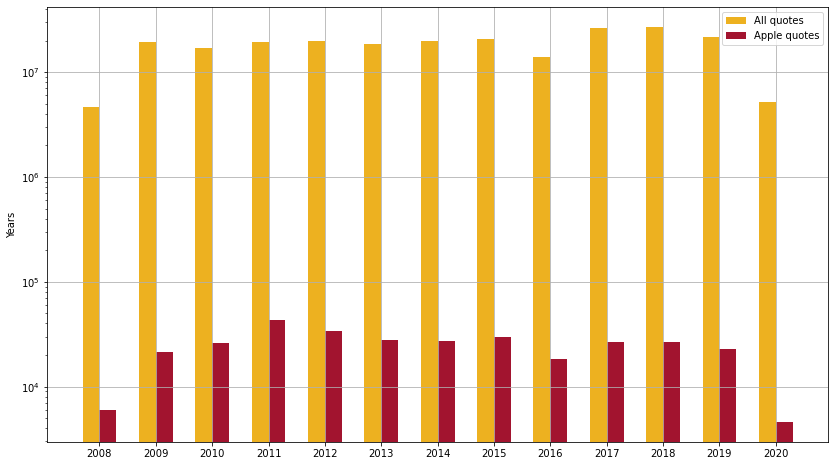

In [19]:
# Plot the results
bar_plots_quotes(frequency_all, frequency_apple, years)

In [ ]:
### Baptiste EDA après filtering

This new filtered dataset provides a great preview of Apple mentions in the media.

***
## Yahoo Finance Data Exploration
The yfinance library provides financial metrics on most stocks and indices. It will allow us to quantitatively compare the stock price and volume of Apple to a major equity index, such that the S&P500. Later on we will use this new dataset to find and compare days of high volatility, and find any correlation with potential speakers and quotations.

A stock dataframe consists of the following features: 
 * `Date`: Primary key of the quotation (format: "YYYY-MM-DD").
 * `Open`: Stock price at the daily opening of the market.
 * `High`: Highest stock price reached during the day.
 * `Low`: Lowest stock price reached during the day.
 * `Adj Close`:  Adjusted stock price at the daily close of the market.
 * `Volume`: Amount of stocks that changed hands during the day.

 We will focus our study on the `Adjusted Open`, `Adjusted Close` and `Volume`.

In [75]:
apple_ticker = "AAPL"
year = 2019
apple_stock = yf.download(apple_ticker, start=f'{year}-01-01', end=f'{year}-12-31', progress = False)
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282612,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326294,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508709,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981853,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901775,219111200


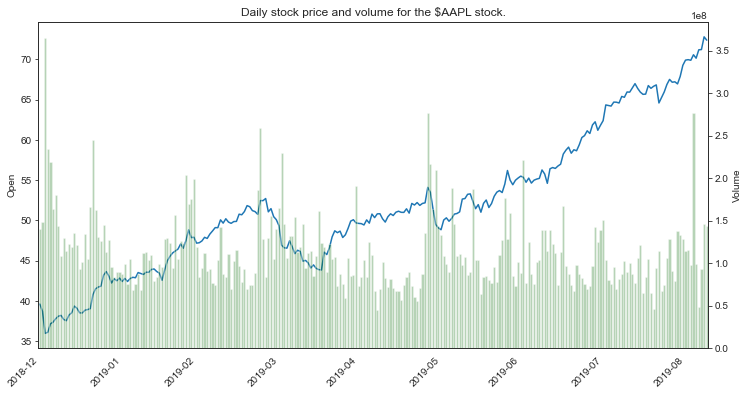

In [135]:
stock("AAPL", year = year, fig = "price_volume")

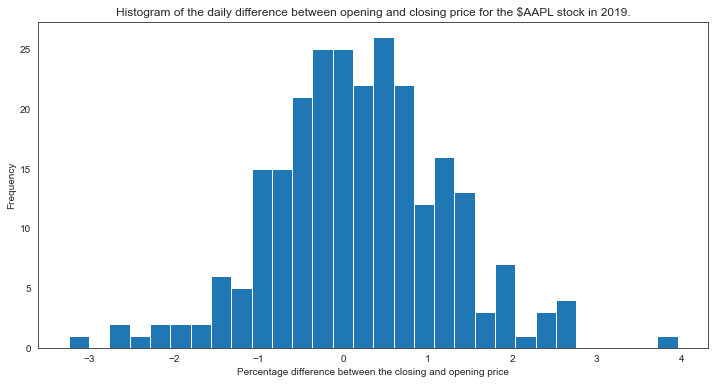

In [70]:
stock("AAPL", year = year, fig = "daily_diff")

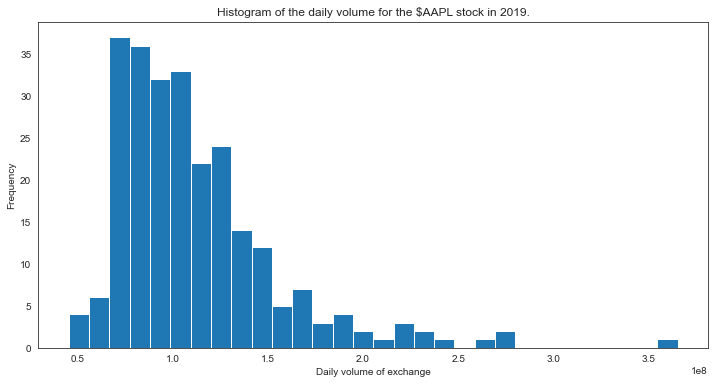

In [71]:
stock("AAPL", year = year, fig = "volume")

We observe the stock price during the year


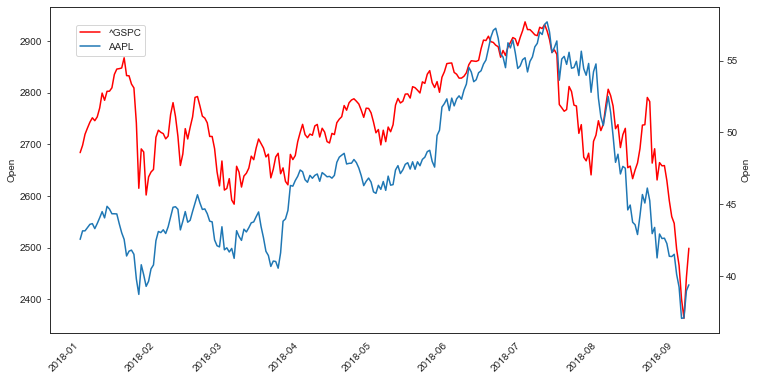

Volume


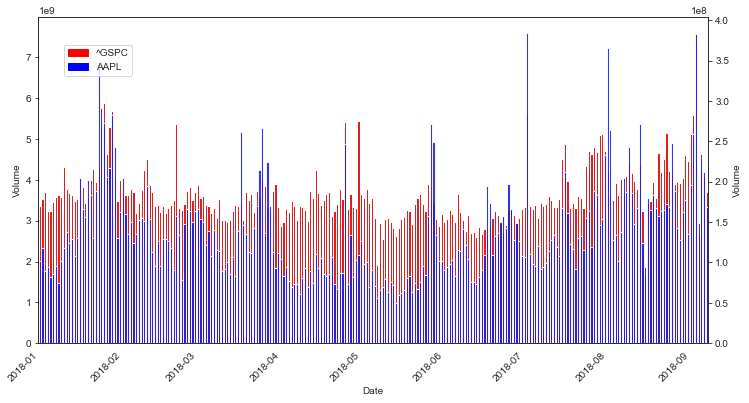

histogram


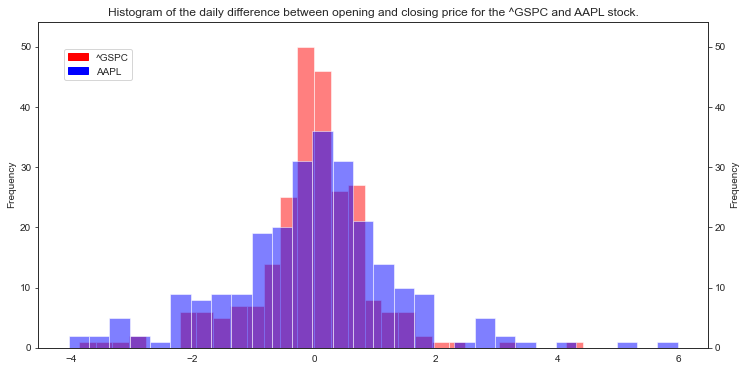

In [67]:
compare("^GSPC", "AAPL", year = year)

In [ ]:
keywords_1_word = ["iphone", "ipad", "imac", "ipod", "macbook", "mac", "airpods", \
        "lightening", "magsafe", "aapl", "iwatch", "itunes", "homepod", "macos", "ios", "ipados", \
        "watchos", "tvos", "wwdc", "siri", "facetime", "appstore", "icloud", "iphones"]

keywords_2_words = ["apple watch", "steve jobs", "tim cook", "face id", \
        "pro display xdr", "katherine adams", "eddy cue", "craig federighi"]

keywords_capital = ["Apple"]

black_list = ["Big Apple"]

keywords = {"One word": keywords_1_word, "Two words": keywords_2_words, "Capital words": keywords_capital, "Black list": black_list}

speakers = ["steve jobs", "tim cook", "katherine adams", "eddy cue", "craig federighi", "john giannandrea", "greg joswiak", \
    "sabih khan", "luca maestri", "deirdre o'brien", "johny srouji", "john ternus", "jeff williams", "lisa jakson", \
    "stella low", "isabel ge mahe", "tor myhren", "adrian perica", "phil schiller", "arthur levinson", "james bell", \
    "albert gore", "andrea jung", "monica lozano", "ronald sugar", "susan wagner"]

***
### Subtask 1 : 
What is the role of the media coverage in explaining stock market fluctuations ? How does the media coverage of Apple evolve over time ? Are there any specific patterns we can observe across the years, for instance bigger coverage when there is the keynote ? Thousands of events occur around the world every day, and humans notice a small subset of these events. Yet, the media attract attention to specific events. In this regard, a company’s media visibility will definitely affect its stock price. We investigate the reciprocal relationships between the fluctuations of the stock market of Apple and media coverage related to this company for a period of 12 years (2008–2020). 

***
### Subtask 2 
Who are the individuals who have influence over potential customers, and do these influencers have an impact on the Apple company image and eventually, on the stock market ? Personality  plays  a huge  role  in  consumer  buying  behavior. Indeed, the high level of public attention and the positive emotional responses that define celebrity increase the economic opportunities available to a firm. We hypothesize that quotes from celebrities significantly impact the stock market, whereas quotes from ordinary people have no significant predictive power. One defining characteristic of a celebrity is that it is a social actor who attracts large-scale public attention : the greater the number of people who know of and pay attention to the actor, the greater the extent and value of that celebrity.

***

### Subtask 3 :
What is the influence of the public opinions or emotions about Apple expressed in the media on the stock market ? Media influences beliefs by providing compelling information about events. In this regard, the media have been identified to play a significant role in shaping the consensus market opinion. Can a series of news articles make a stock rise? On the other hand, can it send a market into turmoil ? We hypothesize that emotions of the public in the media about a company would reflect in its stock price. Indeed, positive news about Apple would encourage people to invest in the stocks of the company. On the other hand, increases in expressions of anxiety, worry and fear would predict downward pressure on the stocks of the company. Understanding the author's opinion from a piece of text is the objective of sentiment analysis. We classify quotes as positive, negative and neutral based on the sentiment present. We want to answer the following questions : are the stock price drops/rises correlated with negative/positive quotes ? 